In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.mixture import BayesianGaussianMixture

In [4]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs

In [5]:
df = pd.read_csv('Shoes_data.csv')

In [6]:
df['rating']=df['rating'].apply(lambda x: str(x).replace(' out of 5 stars','') if ' out of 5 stars' in str(x) else str(x))
df['price']=df['price'].apply(lambda x: str(x).replace('₹','') if '₹' in str(x) else str(x))
df['total_reviews']=df['total_reviews'].apply(lambda x: str(x).replace(' ratings','') if ' ratings' in str(x) else str(x))
df['total_reviews']=df['total_reviews'].apply(lambda x: str(x).replace(' rating','') if ' rating' in str(x) else str(x))
df['rating']=df['rating'].astype(float)
df['price']=df['price'].astype(float)
df['total_reviews']=df['total_reviews'].astype(int)

<AxesSubplot:>

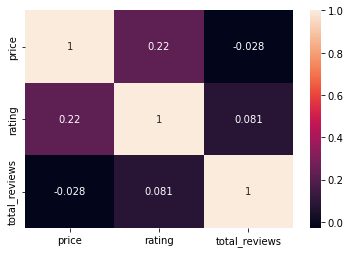

In [7]:
sns.heatmap(df.corr(),annot=True)

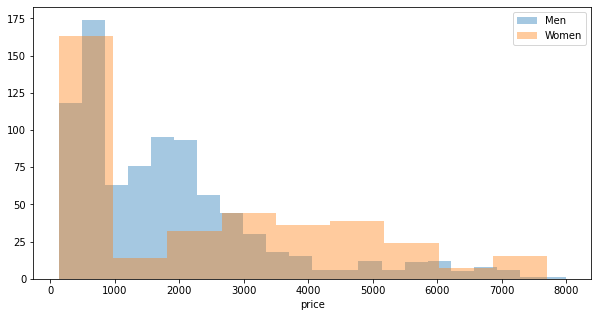

In [8]:
plt.figure(figsize=(10, 5))
sns.distplot(df[df["Shoe Type"]=="Men"].price,kde=False,rug=False)
sns.distplot(df[df["Shoe Type"]=="Women"].price,kde=False,rug=False)

plt.legend(labels=['Men', 'Women'])
plt.show()

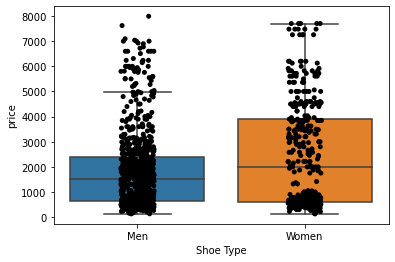

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='Shoe Type', y='price', data=df, showfliers=False, ax=ax)
sns.stripplot(x='Shoe Type', y='price', data=df, jitter=True, color='black', ax=ax)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


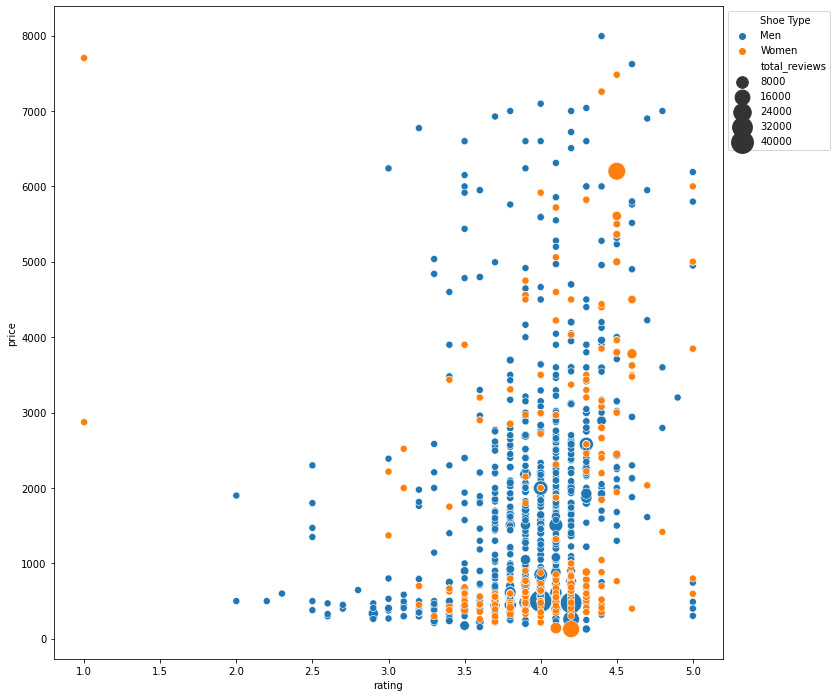

In [10]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df['rating'],y=df['price'],hue=df['Shoe Type'],size=df['total_reviews'],data=df,sizes=(50,500))
plt.xticks(rotation=0)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to C:\Users\Syed
[nltk_data]     Fahad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Syed
[nltk_data]     Fahad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string

list_stopwords = set(stopwords.words('english'))
df['reviews2'] = df['reviews'].str.lower()
df['reviews2'] = df['reviews2'].apply(word_tokenize)
df['reviews2'] = df['reviews2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df['reviews2'] = df['reviews2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df['reviews2'] = df['reviews2'].apply(lambda x : [word for word in x if len(word) > 1])


In [13]:
df1=pd.DataFrame(df['reviews2'].explode())


<AxesSubplot:xlabel='reviews2'>

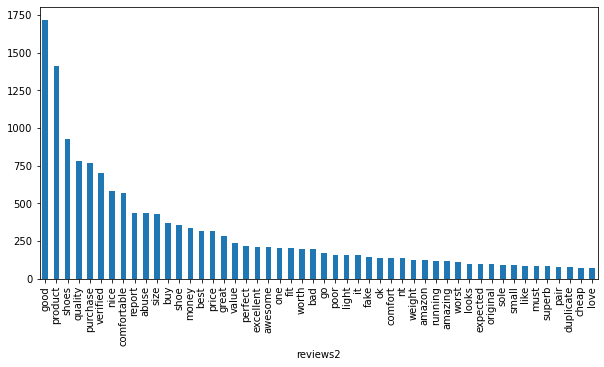

In [14]:
pd.set_option('display.max_rows',50)
df1.groupby('reviews2')['reviews2'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(10,5))

In [15]:
def rating_judge(ex):
    if ex <3 :
        return -1
    elif ex>3 :
        return 1
    else:
        return 0

In [16]:
df.loc[:,'Rpolarity']=df.loc[:,'rating'].apply(rating_judge)
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,reviews2,Rpolarity
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,"[happy, product, expected, average, product, p...",-1
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,"[memory, cushioning, shoes, best, feature, poo...",1
2,T-Rock Men's Sneaker,430.0,3.3,1251,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,"[worth, amount, go, it, perfect, star, itam, r...",1
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,"[sup, quality, good, expected, awesome]",1
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,"[best, satisfied, affordable, beauty, 😘😘😘😘, ey...",1
...,...,...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,7256.0,4.4,200,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women,"[must, buy, great, fiting, great, quality, rep...",1
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,5822.0,4.3,25,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women,"[worth, buying, classy, bold, stylish, great, ...",1
1227,new balance Women's FuelCell Echolucent Runnin...,5362.0,4.5,817,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women,"[size, variation, product, recd, size, chart, ...",1
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,7480.0,4.5,67,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women,"[verified, purchase, verified, purchase, verif...",1


<AxesSubplot:xlabel='Rpolarity'>

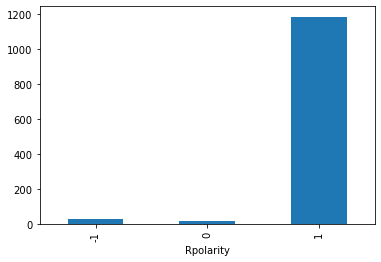

In [17]:
df.groupby('Rpolarity')['title'].count().plot.bar()

In [18]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [20]:
def rounder(num):
    return round(num)
    if num > 0: return 1
    if num < 0: return -1
    return 0

In [21]:
analyzer = SentimentIntensityAnalyzer()

In [22]:
Vpol = []

for text in df['reviews']:
    Vpol.append(rounder(analyzer.polarity_scores(text)['compound']))

df['VPolarity'] = Vpol 

vnotagree = df[df['Rpolarity']!=df['VPolarity']]
vagree = df[df['Rpolarity']==df['VPolarity']]

print(f"Overall length {len(df)} ")
print(f"VADER agreements/disagreements {len(vagree)}/{len(vnotagree)}")
print(f"Accuracy: {len(vagree)/len(df)*100}% ")


Overall length 1230 
VADER agreements/disagreements 848/382
Accuracy: 68.9430894308943% 


In [23]:
df.head()


,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,reviews2,Rpolarity,VPolarity
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,"[happy, product, expected, average, product, p...",-1,-1
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,"[memory, cushioning, shoes, best, feature, poo...",1,1
2,T-Rock Men's Sneaker,430.0,3.3,1251,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,"[worth, amount, go, it, perfect, star, itam, r...",1,1
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,"[sup, quality, good, expected, awesome]",1,0
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,"[best, satisfied, affordable, beauty, 😘😘😘😘, ey...",1,1


In [24]:
df=df.replace({'Men':1, 'Women': 0})

In [25]:
df_ana=df.loc[:,['price','rating','total_reviews','Shoe Type','Rpolarity','VPolarity']]

In [26]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install markupsafe==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

In [29]:
import jinja2

In [30]:
from sklearn.cluster import KMeans
import numpy as np

In [31]:
from pycaret.clustering import *
data_clust = setup

In [32]:
digits = load_digits()
data = scale(digits.data)
y = digits.target

k = 10
samples, features = data.shape

In [33]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [34]:
from sklearn.preprocessing import scale
scaled_data = scale(digits.data)

In [35]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape

In [36]:
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Shoes_data.csv')
data.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [38]:
scaler = preprocessing.StandardScaler()

In [39]:
X = data.values[:, 1:5]
Y = data.values[:,0]

In [40]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average",
affinity="cosine")
model.fit(scaled_data)
print(Y2)
print(model.labels_)
print(metrics.silhouette_score(scaled_data, model.labels_))

[236 215 796 ... 897 509  46]
[107 438 234 ... 439 467 332]
0.0990982269186929


In [41]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"]
for a in aff:
 for l in link:
  if(l=="ward" and a!="euclidean"):
   continue
 else:
   print(a,l)
   model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
   model.fit(scaled_data)
   print(metrics.silhouette_score(scaled_data, model.labels_))

euclidean average
0.1026085319198003
l1 average
0.09489143099243944
l2 average
0.1026085319198003
manhattan average
0.09489143099243944
cosine average
0.0990982269186929


2
0.10620996366298868
3
0.10579739791002307
4
0.09571519189701057
5
0.10229832879268379
6
0.1107805344448784
7
0.11220066330553985
8
0.12432597652295763
9
0.13749929793729085
10
0.14601673384628353
11
0.15622539964283869
12
0.15659690129652823
13
0.15345708554912252
14
0.15194416815403003
15
0.15152410501106192
16
0.15013585165316767
17
0.12557368795603593
18
0.1630475274531372


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


19
0.15072407610277883


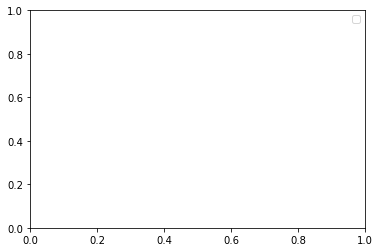

In [42]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 20):
 kmeans = cluster.KMeans(n_clusters=k)
 kmeans.fit(scaled_data)
 print(k)
 print(metrics.silhouette_score(scaled_data, kmeans.labels_))
plt.legend()
plt.show()

In [43]:
 kmeans = cluster.KMeans(n_clusters=k)
 kmeans.fit(scaled_data)

KMeans(n_clusters=19)

In [44]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

In [45]:
kmeans.inertia_

100423.84303432594

Text(0, 0.5, 'Inertia')

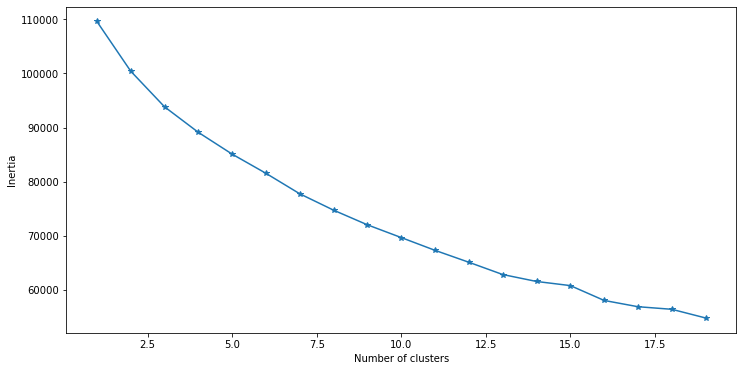

In [46]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') 
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [47]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
pred

array([2, 4, 4, ..., 4, 1, 1])

In [48]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    496
1    438
3    354
0    332
2    177
Name: cluster, dtype: int64

In [49]:
df = df[["reviews", "reviews_rating"]]
df.head()

,reviews,reviews_rating
0,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...
1,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...
2,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
3,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...
4,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...


In [50]:
rew = []
rat = []
for j in df.index:
 lst = [i for i in df.iloc[j].reviews.split('||')]
 for k in lst:
  rew.append(k)

for j in df.index:
 lst = [i for i in df.iloc[j].reviews_rating.split('||')]
 for k in lst:
  rat.append(k)

df = pd.DataFrame(list(zip(rew, rat)),
 columns =['Review', 'Review_rating'])

In [51]:
df.head()

,Review,Review_rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


In [52]:
import nltk
from string import punctuation


In [53]:
import re
def lower(text):
 return text.lower()
def remove_punctuation(text):
 return text.translate(str.maketrans('','', punctuation))
def remove_stopwords(text):
 return " ".join([word for word in str(text).split() if word not in stop])
# Removing all words with digits and standalone digits
def remove_digits(text):
 return re.sub(r'\d+', '', text)
def remove_emoji(text):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
u"\U0001F300-\U0001F5FF" # symbols & pictographs
u"\U0001F680-\U0001F6FF" # transport & map symbols
u"\U0001F1E0-\U0001F1FF" # flags (iOS)
u"\U00002702-\U000027B0"
u"\U000024C2-\U0001F251"
"]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', text)
# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
 text = text.encode("ascii", "ignore")
 return text.decode()
# One function to clean it all
def clean_text(text):
 text = lower(text)
 text = remove_punctuation(text)
 #text = remove_stopwords(text)
 text = remove_digits(text)
 text = remove_emoji(text)
 text = remove_non_printable(text)
 return text


In [54]:
def get_first_digit(text):
 match = re.search(r'\d', text)
 return match[0]


In [55]:
df['Review_rating']=df['Review_rating'].apply(get_first_digit)
df['clean_review']=df['Review'].apply(clean_text)
df.head()

,Review,Review_rating,clean_review
0,Not happy with product,1,not happy with product
1,It's not as expected.,1,its not as expected
2,AVERAGE PRODUCT,3,average product
3,Pic more beautiful,3,pic more beautiful
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for


In [56]:
all_text_clean = str()
for sentence in df['clean_review'].values:
 all_text_clean += sentence
''.join(set(all_text_clean))

'vdegrhoyikpxumjfabntzcswlq '

In [57]:
!pip install wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(40,25))
subset1 = df[df['Review_rating']=='1']
text = subset1.clean_review.values

<Figure size 2880x1800 with 0 Axes>

In [58]:
all_text_clean = str()
for sentence in df['clean_review'].values:
 all_text_clean += sentence
''.join(set(all_text_clean))

'vdegrhoyikpxumjfabntzcswlq '

In [59]:
!pip install wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(40,25))
subset1 = df[df['Review_rating']=='1']
text = subset1.clean_review.values


<Figure size 2880x1800 with 0 Axes>

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9958 entries, 0 to 9957
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         9958 non-null   object
 1   Review_rating  9958 non-null   object
 2   clean_review   9958 non-null   object
dtypes: object(3)
memory usage: 233.5+ KB


In [61]:
df["Review_rating"]=pd.to_numeric(df["Review_rating"])


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9958 entries, 0 to 9957
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         9958 non-null   object
 1   Review_rating  9958 non-null   int64 
 2   clean_review   9958 non-null   object
dtypes: int64(1), object(2)
memory usage: 233.5+ KB


In [63]:
def condition(x):
 if x >= 4:
  return "Positive"
 elif x == 3:
  return "Neutral"
 else:
  return "Negative"
df['Rates'] = df['Review_rating'].apply(condition)
df


,Review,Review_rating,clean_review,Rates
0,Not happy with product,1,not happy with product,Negative
1,It's not as expected.,1,its not as expected,Negative
2,AVERAGE PRODUCT,3,average product,Neutral
3,Pic more beautiful,3,pic more beautiful,Neutral
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for,Neutral
...,...,...,...,...
9953,Go for it!,5,go for it,Positive
9954,Excellent product,5,excellent product,Positive
9955,Nice shoe,5,nice shoe,Positive
9956,Nice,5,nice,Positive


In [64]:
%matplotlib inline


<AxesSubplot:xlabel='Review_rating', ylabel='count'>

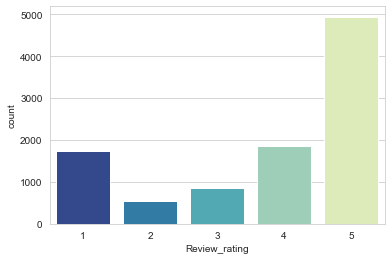

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Review_rating', data=df, palette='YlGnBu_r')


<AxesSubplot:xlabel='Rates', ylabel='count'>

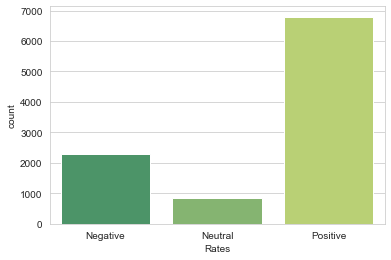

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Rates', data=df, palette='summer')


In [67]:
df=pd.DataFrame(df['Rates'],columns=['Rates', 'Count'])
df['Count']=1
df=df.groupby('Rates').sum()
df

,Count
Rates,
Negative,2298
Neutral,863
Positive,6797
